In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

### Plotly
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.plotly as py
from plotly import tools
init_notebook_mode(connected=True)

# Altair
import altair as alt
alt.renderers.enable("notebook")

### Removes warnings that occassionally show up
import warnings
warnings.filterwarnings("ignore")

In [8]:
size = (50, 50)

data1 = np.random.uniform(0, 1, size=size)
data2 = np.random.uniform(0, 1, size=size)

systems = [data1, data2]

fig = tools.make_subplots(rows=1, cols=2, subplot_titles=("K Space", "Picture Space"))

for i, system in enumerate(systems):
    trace = go.Heatmap(z=system[i],
                       colorscale=[[0, "rgb(50, 235, 50)"], [1, "rgb(50, 50, 235)"]],
                       showlegend=False,
                       showscale=False)
    fig.append_trace(trace, 1, i+1)

fig["layout"]["autosize"] = True

for axis in ("xaxis1", "xaxis2", "yaxis1", "yaxis2"):
    fig.layout[axis]["autorange"] = True
    fig.layout[axis]["ticks"] = ''
    for trait in ("showgrid", "zeroline", "showline", "showticklabels"):
        fig.layout[axis][trait] = False
        
iplot(fig);

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



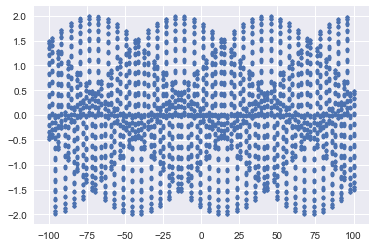

In [23]:
left, right = -100, 100
down, up = -100, 100
resolution = 100
size = (50, 50)

width = np.linspace(start = left, stop = right, num = resolution)
height = np.linspace(start = down, stop = up, num = resolution)

x = pd.DataFrame({"x": width, "id": 1})
y = pd.DataFrame({"y": height, "id": 1})

result = pd.merge(left = x, right = y, how = "outer", on = "id").drop("id", axis=1)
result["space"] = 0

### K Space encoding
### (x, y, amplitude)
data1 = [(1, 1, 1)]

for wave in data1:
    result["space"] += wave[2] * np.sin(result["x"] * wave[0])
    result["space"] += wave[2] * np.sin(result["y"] * wave[1])

pltx = result["x"]
plty = result["space"]

plt.plot(pltx, plty, ".");

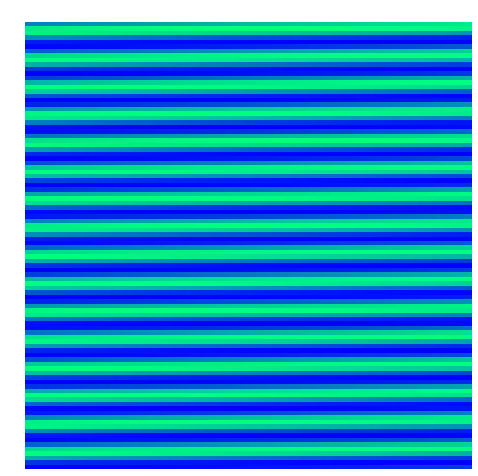

In [49]:
left, right = -100, 100
down, up = -100, 100
resolution = 100
size = (100, 100)
mid = 25

result = np.zeros(shape = size)

### K Space encoding
### (x, y, amplitude)
data1 = [(1, 0.1, 0.01)]

for wave in data1:
    for i in range(len(result)):
        for j in range(len(result)):
            result[i][j] += wave[2] * np.sin((i * wave[0]) + (j * wave[1]))
#             result[i][j] += wave[2] * np.sin(j * wave[1])

plt.figure(figsize=(8, 8))
plt.matshow(result, cmap="winter", fignum=1)
plt.axis('off');

In [19]:
# trace = go.Heatmap(
#     x = result["x"],
#     y = result["y"],
#     z = result["space"],
# )

# sns.heatmap(result,)
result.space
# fig = dict(data=[trace])
# iplot(fig)

0       0.506366
1       0.556715
2      -0.990073
3       0.303521
4       0.726356
5      -0.934623
6       0.085701
7       0.860160
8      -0.833061
9      -0.136347
10      0.951527
11     -0.690398
12     -0.351668
13      0.995948
14     -0.513672
15     -0.549638
16      0.991231
17     -0.311603
18     -0.720491
19      0.937610
20     -0.094161
21     -0.855797
22      0.837730
23      0.127927
24     -0.948880
25      0.696518
26      0.343703
27     -0.995148
28      0.520942
29      0.542522
          ...   
9970   -0.542522
9971   -0.520942
9972    0.995148
9973   -0.343703
9974   -0.696518
9975    0.948880
9976   -0.127927
9977   -0.837730
9978    0.855797
9979    0.094161
9980   -0.937610
9981    0.720491
9982    0.311603
9983   -0.991231
9984    0.549638
9985    0.513672
9986   -0.995948
9987    0.351668
9988    0.690398
9989   -0.951527
9990    0.136347
9991    0.833061
9992   -0.860160
9993   -0.085701
9994    0.934623
9995   -0.726356
9996   -0.303521
9997    0.9900